In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import scikitplot as skplt
from collections import Counter
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,BaseNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC,LinearSVR
from sklearn.svm import NuSVC,NuSVR
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier,
                              RandomForestRegressor,
                              GradientBoostingClassifier,
                              GradientBoostingRegressor,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,
                             auc,
                             confusion_matrix,
                             recall_score,
                             roc_auc_score,
                             accuracy_score,
                             balanced_accuracy_score,
                             classification_report,
                             f1_score,
                             precision_recall_fscore_support)
from sklearn.preprocessing import label_binarize,OneHotEncoder,MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

Using TensorFlow backend.


In [2]:
# some global variables
n_neighbors = 3
models = {'Naive Bayes':[],
          'KNN':[],
          'LDA':[],
          'QDA':[],
          'Linear SVM':[],
          'Non Linear SVM':[],
          'Logistic Regression':[],
          'CART':[],
          'Random Forest':[],
          'AdaBoost':[],
          'GradBoost':[]}

In [3]:
#Loading the data
data = pd.read_csv('D:/m2/app_sup/projet_app_sup_20/Datasets_projet_MLDS/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Ommiting some variables
to_drop = ['Time','Amount']
data_c = data.drop(to_drop,axis=1)
data_c

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


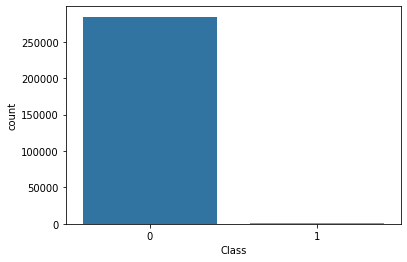

In [5]:
# Check imbalance
ax = sns.countplot(x='Class', data=data_c)

Resampled dataset shape Counter({0.0: 284315, 1.0: 284315})


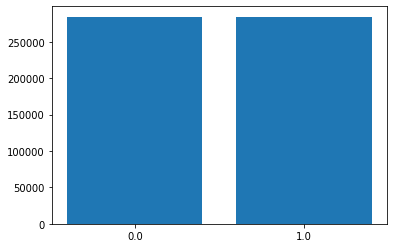

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.125056,2.797045,-6.436962,3.250654,-1.673880,-2.737504,-2.301424,0.969237,-1.900690,-4.937166,...,0.333431,0.647769,0.129735,0.201975,0.005538,-0.168130,0.569294,0.156908,-0.102253,1.0
568626,-3.352917,0.753401,-1.698278,0.863169,-1.186314,-0.406322,-1.652498,0.020940,-0.018209,-2.696694,...,-0.371572,0.342796,0.454379,-0.130009,-0.499223,-0.042935,0.987288,-1.389017,0.750979,1.0
568627,0.418201,1.290016,-1.977979,2.334900,-0.858962,-0.446977,-2.353758,0.620435,-1.364803,-2.888616,...,0.363843,0.546788,0.316294,-0.309333,-0.716316,0.825396,-0.073520,0.560620,0.276735,1.0
568628,-1.269532,4.185133,-6.113043,5.037080,1.080631,-2.122858,-1.298991,0.575999,-3.684205,-6.215259,...,0.404658,0.330215,-0.863163,-0.292751,-0.297741,0.296018,-0.013180,0.780460,0.397597,1.0


In [6]:
# ooversampling data
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(data_c.values[:,:-1],data_c.values[:,-1])
bl_os=Counter(Y)
print('Resampled dataset shape %s' % bl_os)
plt.bar([str(k) for k in bl_os.keys()],bl_os.values(),align='center')
plt.show()


dx = {head:x for (head,x) in zip(list(data_c)[:-1],X.T)}
dy = {'Class':Y}
data_smote = pd.concat([pd.DataFrame.from_dict(dx),pd.DataFrame.from_dict(dy)],axis=1)
data_smote


In [7]:
# Normalizing the data
x = data_smote.values[:,:-1] #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_c_n = pd.concat([pd.DataFrame(x_scaled),data_smote.iloc[:,-1]],axis=1)
data_c_n

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.956169,0.796771,0.725870,0.396029,0.754448,0.235497,0.251335,0.795782,0.397305,0.406574,...,0.583816,0.571922,0.516083,0.668433,0.382980,0.568469,0.518441,0.419407,0.311049,1.0
568626,0.901332,0.775208,0.807985,0.290194,0.757730,0.258935,0.255288,0.785610,0.462153,0.452928,...,0.576309,0.567006,0.531228,0.663503,0.314964,0.575497,0.586720,0.390873,0.328364,1.0
568627,0.965398,0.780870,0.803138,0.355434,0.759934,0.258526,0.251016,0.792041,0.415765,0.448958,...,0.584139,0.570294,0.524786,0.660840,0.285711,0.624238,0.413439,0.426859,0.318740,1.0
568628,0.936726,0.811418,0.731483,0.475220,0.772991,0.241676,0.257442,0.791564,0.335866,0.380131,...,0.584574,0.566803,0.469764,0.661086,0.342114,0.594523,0.423295,0.430916,0.321192,1.0


In [8]:
# Standadizingthe data
x = data_smote.values[:,:-1] #returns a numpy array
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)
data_c_s = pd.concat([pd.DataFrame(x_scaled),data_smote.iloc[:,-1]],axis=1)
data_c_s

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.174215,-0.522690,0.971137,-0.272861,0.298467,0.695024,0.519637,-0.053755,0.729038,0.654007,...,0.063496,-0.147505,0.250541,-0.115021,0.221885,0.143379,-0.480674,0.039141,-0.153846,0.0
1,0.640431,-0.429672,0.588093,-0.567490,0.394496,0.373578,0.464299,-0.056638,0.458664,0.596720,...,-0.250811,-0.223620,-0.560802,0.108835,-0.527985,0.207024,0.225607,-0.106864,-0.069918,0.0
2,0.174481,-0.870518,0.847790,-0.589152,0.258720,1.484618,0.615550,-0.022161,-0.091168,0.679976,...,0.331782,-0.049804,0.687716,0.963112,-1.172152,-0.608192,-0.368528,-0.154360,-0.244628,0.0
3,0.246119,-0.553550,0.850988,-0.982964,0.377542,1.158129,0.519291,0.005357,-0.035439,0.621616,...,-0.387083,-0.180521,0.009253,-0.199428,-2.068614,0.998176,-0.554246,-0.033416,0.039712,0.0
4,0.211045,-0.261825,0.811505,-0.581785,0.281864,0.478779,0.581047,-0.132058,0.927253,0.801194,...,0.217593,-0.144248,0.711262,-0.143547,0.358926,-0.407800,1.069526,0.127091,0.400259,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.399818,0.264921,-0.479230,0.320358,-0.023499,-1.193172,0.078010,0.130861,-0.259727,-0.463421,...,0.143932,0.096861,0.119433,0.215272,0.108716,-0.345393,1.219749,0.063057,-0.344330,1.0
568626,-0.189947,-0.295948,0.286690,-0.436011,0.094040,0.182415,0.190793,-0.070245,0.562243,0.034508,...,-0.547460,-0.015025,0.406824,-0.135672,-0.821788,-0.139130,2.156932,-1.520424,1.657228,1.0
568627,0.499076,-0.148677,0.241481,0.030242,0.172955,0.158425,0.068914,0.056890,-0.025737,-0.008146,...,0.173756,0.059814,0.284584,-0.325238,-1.221990,1.291469,-0.221500,0.476578,0.544721,1.0
568628,0.190710,0.645875,-0.426875,0.886308,0.640537,-0.830481,0.252232,0.047466,-1.038485,-0.747468,...,0.213783,-0.019641,-0.759534,-0.307708,-0.450365,0.419304,-0.086211,0.701758,0.828247,1.0


In [9]:
# Check for missing values 
np.any(data_c_s.isnull().values)

False

In [10]:
# A statistical summary of the data before/after normalisation
data_c_n.describe()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
count,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,...,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.000000,568630.0
mean,0.918993,0.786586,0.777249,0.351203,0.755104,0.255827,0.248601,0.789163,0.417795,0.449716,...,0.582253,0.567666,0.509789,0.665409,0.375034,0.580237,0.429576,0.418271,0.314027,0.5
std,0.092982,0.038447,0.107211,0.139925,0.027925,0.017038,0.035053,0.050582,0.078894,0.093095,...,0.010857,0.043940,0.052697,0.014049,0.073096,0.034071,0.072855,0.018020,0.008651,0.5
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.911518,0.766069,0.750344,0.248390,0.753922,0.247622,0.247218,0.783408,0.383560,0.413500,...,0.578343,0.558896,0.486131,0.662192,0.330498,0.561645,0.381130,0.415414,0.312086,0.0
50%,0.945903,0.777652,0.813569,0.311031,0.762737,0.256150,0.261390,0.787134,0.437805,0.490404,...,0.580724,0.563986,0.511324,0.664906,0.381845,0.580933,0.423562,0.417480,0.313870,0.5
75%,0.975859,0.796807,0.843283,0.436384,0.768846,0.263240,0.267059,0.794689,0.467569,0.508791,...,0.584764,0.572076,0.535136,0.668000,0.429026,0.599555,0.475488,0.424971,0.317493,1.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [11]:
def results_report(model,y_true):
    metrics={'acc':0,
         'bal_acc':0,
         'recall':0,
         'f_1_score':0,
         'roc_auc_score':0}
    y_pred = model.predict(x_te)
    metrics['acc']=accuracy_score(y_te,y_pred)
    metrics['bal_acc']=accuracy_score(y_te,y_pred)
    metrics['recall']=recall_score(y_te,y_pred,average='macro')
    metrics['f_1_score']=f1_score(y_te,y_pred,average='macro')
    classes = list(set(y_true).union(set(y_pred)))
    metrics['roc_auc_score']=roc_auc_score(label_binarize(y_te,classes),label_binarize(y_pred,classes))
    
    plt.bar(metrics.keys(),metrics.values())
    plt.show()
    return metrics
    
def plot_curves(model,y_true,x_te):
    y_pred = model.predict(x_te)
    skplt.metrics.plot_confusion_matrix(y_true,y_pred)
    predict_proba = getattr(model, "predict_proba", None)
    if callable(predict_proba):
        y_probas = model.predict_proba(x_te)
        skplt.metrics.plot_roc(y_true, y_probas)
        skplt.metrics.plot_precision_recall(y_true,y_probas)
        

In [12]:
# splittign the dataset
x_t,x_te,y_t,y_te = train_test_split(data_c_n.values[:,:-1],
                                     data_c_n.values[:,-1],
                                     test_size=0.33, 
                                     random_state=42)

# Naive Bayes classifier

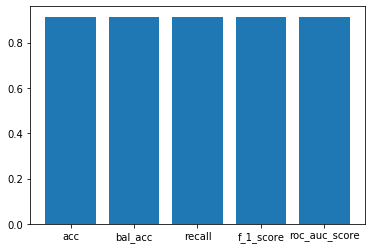

{'acc': 0.913955917462483, 'bal_acc': 0.913955917462483, 'recall': 0.9139871544571911, 'f_1_score': 0.9136519219101331, 'roc_auc_score': 0.9139871544571911}
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     93775
         1.0       0.97      0.85      0.91     93873

    accuracy                           0.91    187648
   macro avg       0.92      0.91      0.91    187648
weighted avg       0.92      0.91      0.91    187648



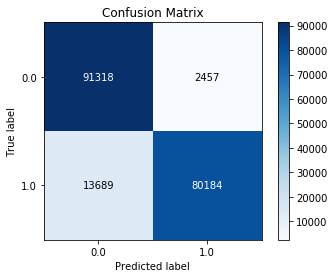

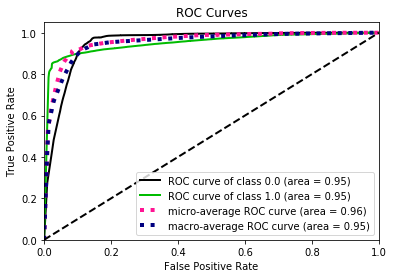

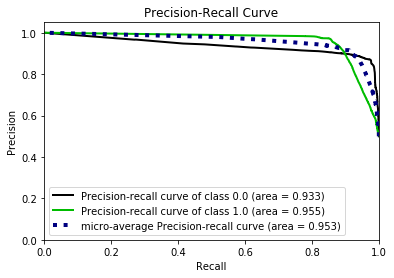

In [13]:
NB_model = GaussianNB()
# fitting the model
NB_model.fit(x_t,y_t)
#evaluating the model
r = results_report(NB_model,y_te)
print(r)
models['Naive Bayes']=r
y_pred = NB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(NB_model,y_te,x_te)

# KNN

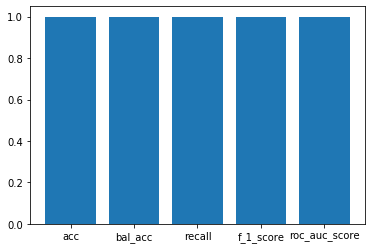

{'acc': 0.9991899727148704, 'bal_acc': 0.9991899727148704, 'recall': 0.999189549453479, 'f_1_score': 0.99918997127709, 'roc_auc_score': 0.9991895494534792}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93775
         1.0       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



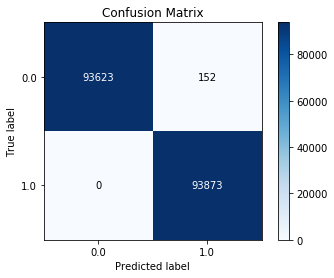

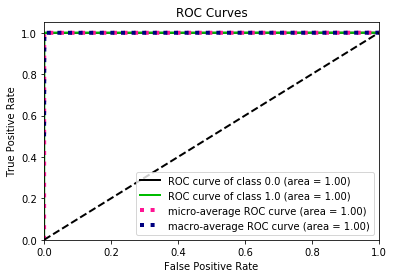

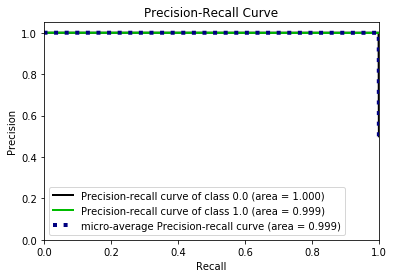

In [14]:
KNN_model = KNeighborsClassifier(n_neighbors)
KNN_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(KNN_model,y_te)
print(r)
models['KNN']=r
y_pred = KNN_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(KNN_model,y_te,x_te)

# LDA

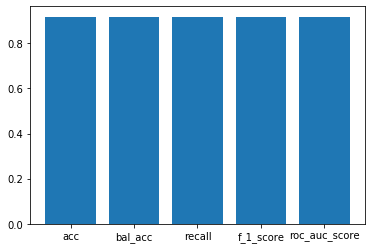

{'acc': 0.9174038625511596, 'bal_acc': 0.9174038625511596, 'recall': 0.9174402298518299, 'f_1_score': 0.9170069430003261, 'roc_auc_score': 0.9174402298518299}
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     93775
         1.0       0.98      0.85      0.91     93873

    accuracy                           0.92    187648
   macro avg       0.93      0.92      0.92    187648
weighted avg       0.93      0.92      0.92    187648



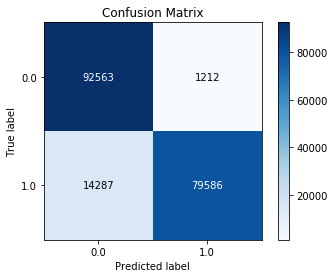

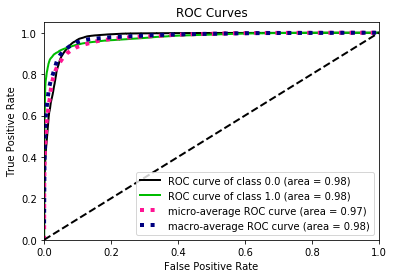

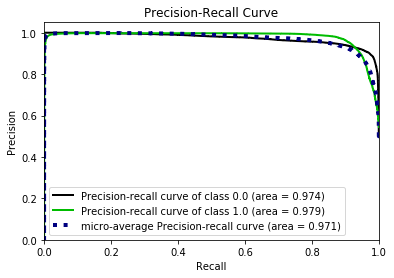

In [16]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LDA_model,y_te)
print(r)
models['LDA']=r
y_pred = LDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(LDA_model,y_te,x_te)

# QDA

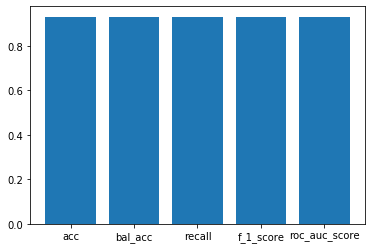

{'acc': 0.9300445515006821, 'bal_acc': 0.9300445515006821, 'recall': 0.9300654367418583, 'f_1_score': 0.9299352062389861, 'roc_auc_score': 0.9300654367418583}
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93     93775
         1.0       0.97      0.89      0.93     93873

    accuracy                           0.93    187648
   macro avg       0.93      0.93      0.93    187648
weighted avg       0.93      0.93      0.93    187648



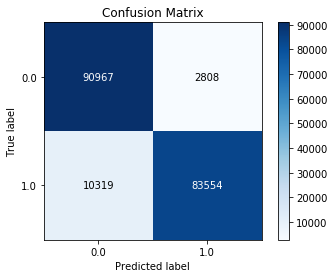

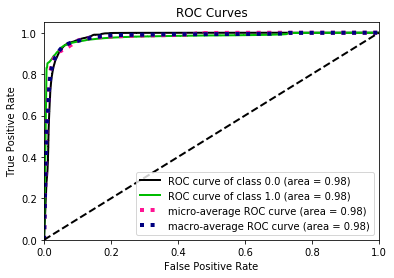

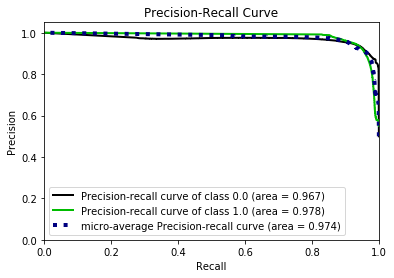

In [18]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(QDA_model,y_te)
print(r)
models['QDA']=r
y_pred = QDA_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(QDA_model,y_te,x_te)

# Linear SVM

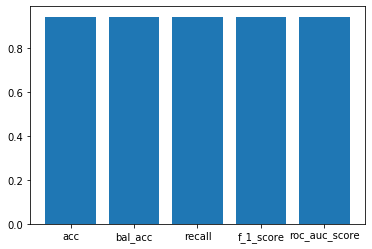

{'acc': 0.9425360248976807, 'bal_acc': 0.9425360248976807, 'recall': 0.9425562901178621, 'f_1_score': 0.9424515587568565, 'roc_auc_score': 0.9425562901178621}
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     93775
         1.0       0.98      0.90      0.94     93873

    accuracy                           0.94    187648
   macro avg       0.95      0.94      0.94    187648
weighted avg       0.95      0.94      0.94    187648



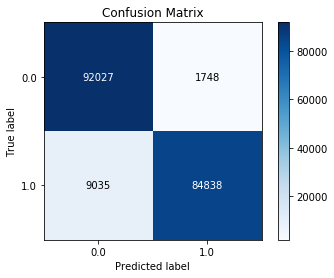

In [20]:
LSVM_model = LinearSVC()
LSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LSVM_model,y_te)
print(r)
models['Linear SVM']=r
y_pred = LSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(LSVM_model,y_te,x_te)

# Non Linear SVM

D:\annaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


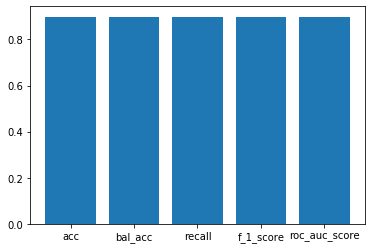

{'acc': 0.8981443980218281, 'bal_acc': 0.8981443980218281, 'recall': 0.8981973811063697, 'f_1_score': 0.8970950465104532, 'roc_auc_score': 0.8981973811063696}
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91     93775
         1.0       1.00      0.80      0.89     93873

    accuracy                           0.90    187648
   macro avg       0.92      0.90      0.90    187648
weighted avg       0.92      0.90      0.90    187648



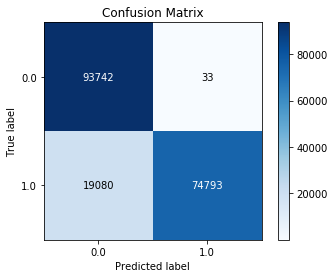

In [22]:
NLSVM_model = NuSVC()
NLSVM_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(NLSVM_model,y_te)
print(r)
models['Non Linear SVM']=r
y_pred = NLSVM_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(NLSVM_model,y_te,x_te)

# Logistic Regression

D:\annaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


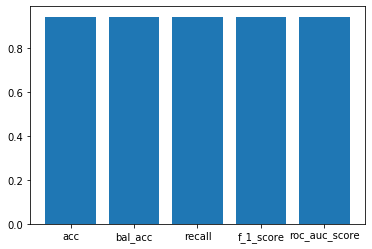

{'acc': 0.9425360248976807, 'bal_acc': 0.9425360248976807, 'recall': 0.9425545979560359, 'f_1_score': 0.942465258666541, 'roc_auc_score': 0.9425545979560358}
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     93775
         1.0       0.98      0.91      0.94     93873

    accuracy                           0.94    187648
   macro avg       0.94      0.94      0.94    187648
weighted avg       0.94      0.94      0.94    187648



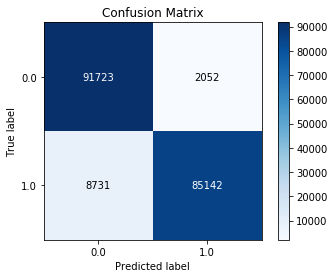

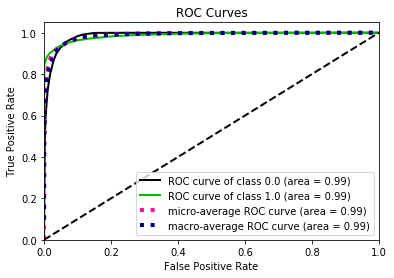

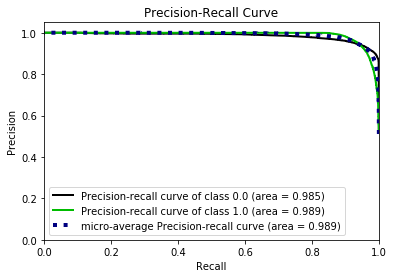

In [24]:
LR_model = LogisticRegression()
LR_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(LR_model,y_te)
print(r)
models['Logistic Regression']=r
y_pred = LR_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(LR_model,y_te,x_te)  

# CART

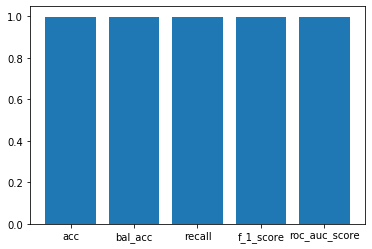

{'acc': 0.9979056531377899, 'bal_acc': 0.9979056531377899, 'recall': 0.9979052267429398, 'f_1_score': 0.997905649390572, 'roc_auc_score': 0.9979052267429398}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93775
         1.0       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



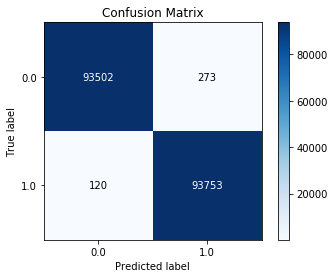

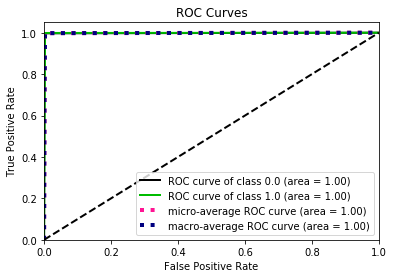

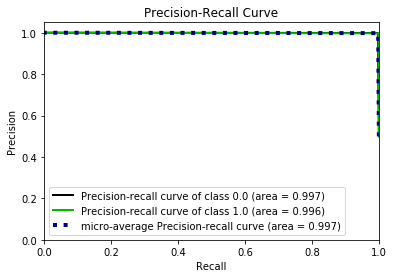

In [26]:
CART_model = DecisionTreeClassifier()
CART_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(CART_model,y_te)
print(r)
models['CART']=r
y_pred = CART_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(CART_model,y_te,x_te)  

# Random forest

D:\annaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


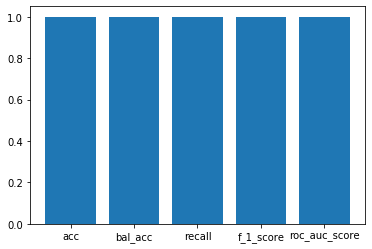

{'acc': 0.9998774300818554, 'bal_acc': 0.9998774300818554, 'recall': 0.9998773827346892, 'f_1_score': 0.99987743003582, 'roc_auc_score': 0.9998773827346892}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93775
         1.0       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



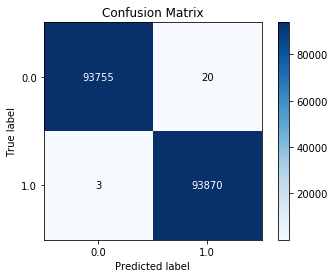

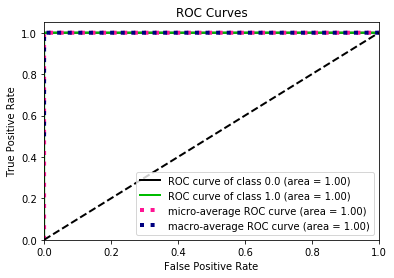

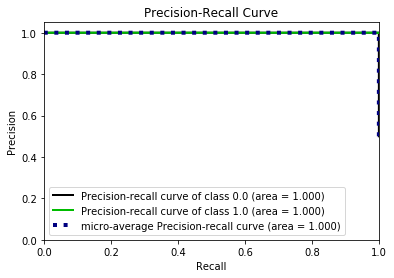

In [28]:

RF_model = RandomForestClassifier()
RF_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(RF_model,y_te)
print(r)
models['Random Forest']=r
y_pred = RF_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(RF_model,y_te,x_te)

# Ada boost

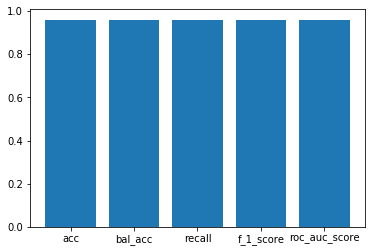

{'acc': 0.95978107946794, 'bal_acc': 0.95978107946794, 'recall': 0.9597882351375524, 'f_1_score': 0.9597740702393425, 'roc_auc_score': 0.9597882351375524}
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     93775
         1.0       0.97      0.95      0.96     93873

    accuracy                           0.96    187648
   macro avg       0.96      0.96      0.96    187648
weighted avg       0.96      0.96      0.96    187648



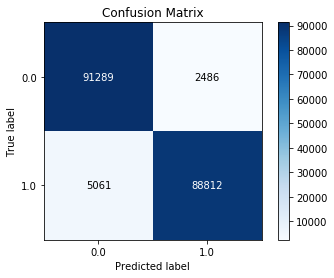

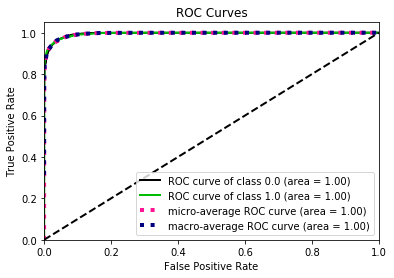

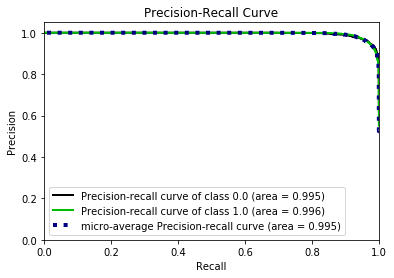

In [30]:
AB_model = AdaBoostClassifier()
AB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(AB_model,y_te)
print(r)
models['AdaBoost']=r
y_pred = AB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

# Grad boost

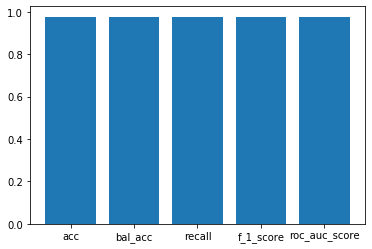

{'acc': 0.9768769184856753, 'bal_acc': 0.9768769184856753, 'recall': 0.9768821974014064, 'f_1_score': 0.9768747882617228, 'roc_auc_score': 0.9768821974014062}
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     93775
         1.0       0.99      0.97      0.98     93873

    accuracy                           0.98    187648
   macro avg       0.98      0.98      0.98    187648
weighted avg       0.98      0.98      0.98    187648



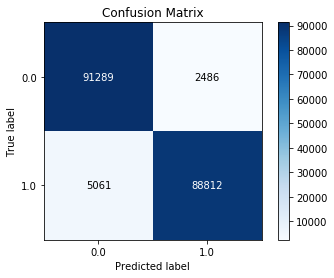

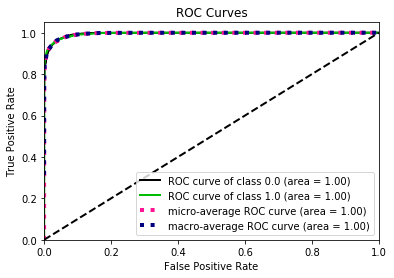

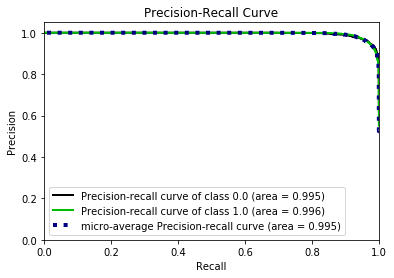

In [32]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_t,y_t)
#evaluating the model 
r = results_report(GB_model,y_te)
print(r)
models['GradBoost']=r
y_pred = GB_model.predict(x_te)
print(classification_report(y_te,y_pred,labels=list(set(data_c_s.values[:,-1]))))
plot_curves(AB_model,y_te,x_te)

In [33]:
m = pd.DataFrame.from_dict(models).T
m = m.sort_values(by =list(m),ascending=False)
m

,acc,bal_acc,recall,f_1_score,roc_auc_score
Random Forest,0.999877,0.999877,0.999877,0.999877,0.999877
KNN,0.999190,0.999190,0.999190,0.999190,0.999190
CART,0.997906,0.997906,0.997905,0.997906,0.997905
GradBoost,0.976877,0.976877,0.976882,0.976875,0.976882
AdaBoost,0.959781,0.959781,0.959788,0.959774,0.959788
Linear SVM,0.942536,0.942536,0.942556,0.942452,0.942556
Logistic Regression,0.942536,0.942536,0.942555,0.942465,0.942555
QDA,0.930045,0.930045,0.930065,0.929935,0.930065
LDA,0.917404,0.917404,0.917440,0.917007,0.917440
Naive Bayes,0.913956,0.913956,0.913987,0.913652,0.913987
